# Lab 1 : Probability Theory


1.   Sampling from uniform distribution
2.   Sampling from Gaussian distribution
3.   Sampling from categorical distribution through uniform distribution
4.   Central limit theoram
5.   Law of large number
6.   Area and circumference of a circle using sampling
7.   Fun Problem

**There are missing fields in the code that you need to fill to get the results but note that you can write you own code to obtain the results**







## 1.Sampling from uniform distribution

a) Generate N points from a uniform distribution range from [0 1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)
N = 100 #  Number of points (Example = 10)
X = np.random.uniform(0,1,N) #  Generate N points from a uniform distribution range from [0 1] # Ref : https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html


b) Show with respect to no. of sample, how the sampled distribution converges to parent distribution.



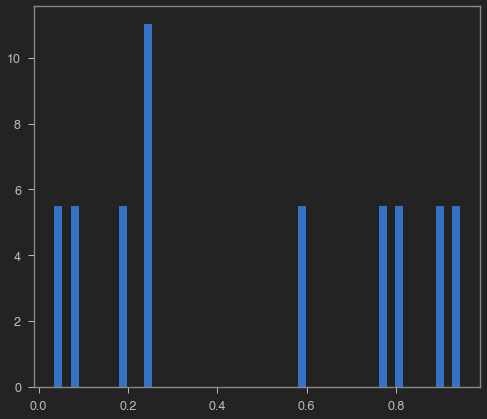

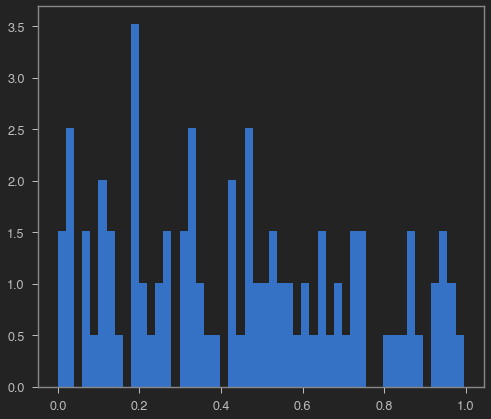

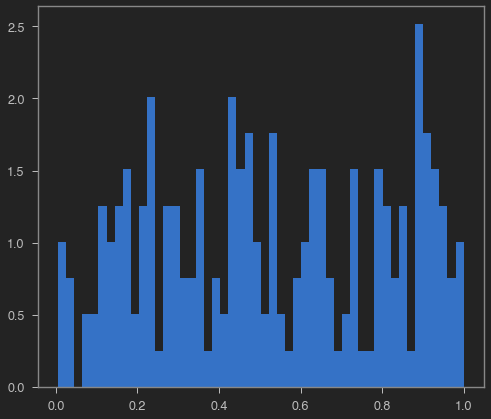

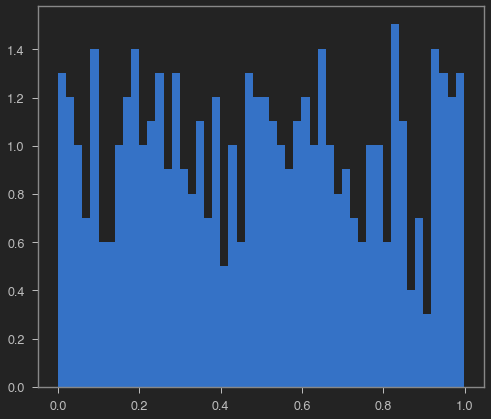

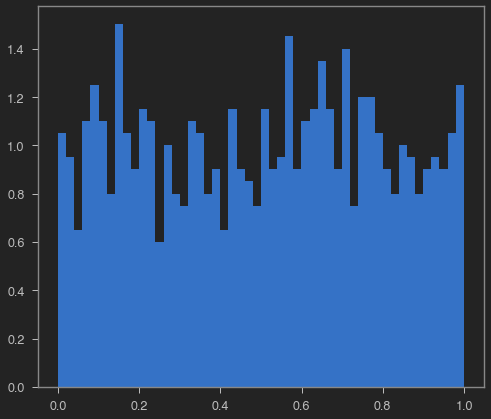

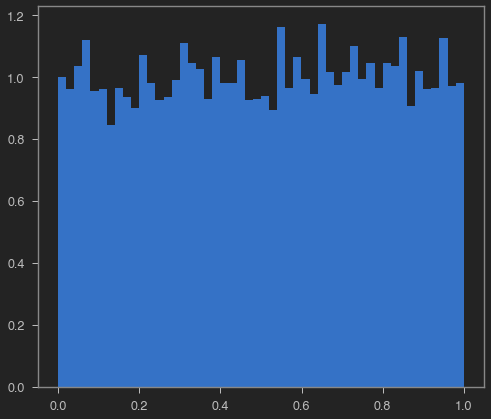

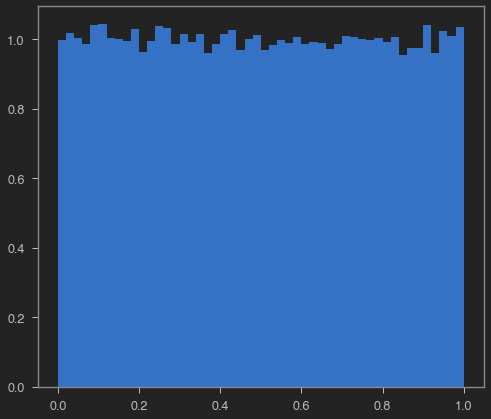

In [2]:
arr =  np.array([10,100,200,500,1000,10000,100000])# Create a numpy array of different values of no. of samples # Ref : https://numpy.org/doc/stable/reference/generated/numpy.array.html

for i in arr:
  x =  np.random.uniform(0,1,i)# Generate i points from a uniform distribution range from [0 1] 
  # write the code to plot the histogram of the samples for all values in arr # Ref : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
  plt.hist(x, bins = 50, density = True)
  plt.show()

c) Law of large numbers: $average(x_{sampled})=\bar{x}$, where x is a uniform random variable of range [0,1], thus $\bar{x}=\int_{0}^{1} x f(x) dx=0.5$

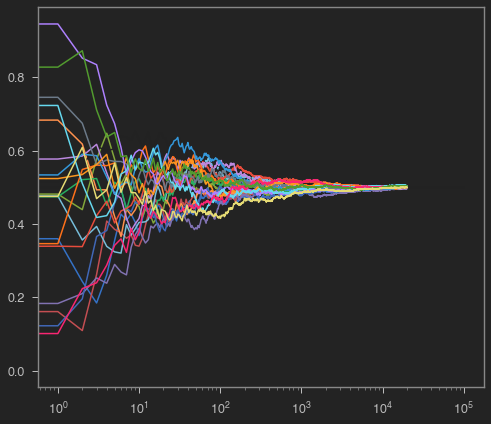

In [3]:
N = 20000 # Number of points (>10000)
k = 20 # set a value for number of runs

## Below code plots the semilog scaled on x-axis where all the samples are equal to the mean of distribution 
m = 0.5 # mean of uniform distribution
m = np.tile(m,x.shape)
plt.semilogx(m,color='k') # Ref : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html

for j in range(k):

    i =  np.arange(1,N+1)# Generate a list of numbers from (1,N) # Ref : https://numpy.org/doc/stable/reference/generated/numpy.arange.html 
    x =  np.random.uniform(0,1,N)#  Generate N points from a uniform distribution range from [0 1]
    mean_sampled = np.cumsum(x)/(i) # Ref : https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
    ## Write code to plot semilog scaled on x-axis of mean_sampled, follow the above code of semilog for reference 
    plt.semilogx(mean_sampled)
plt.show()


## 2. Sampling from Gaussian Distribution

a) Draw univariate Gaussian distribution (mean 0 and unit variance)






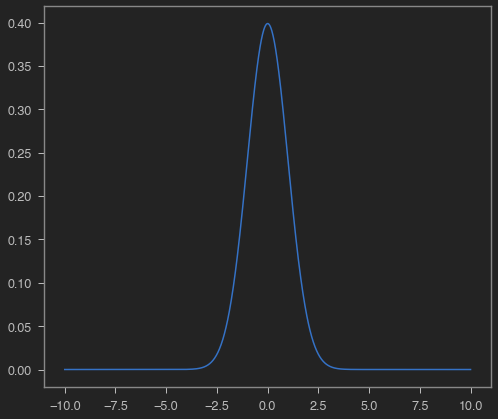

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10,10,1000)
# Define mean and variance
mean = 0
variance = 1


gauss_distribution = 1/(np.sqrt(2 * np.pi*variance))*np.exp( - (X - mean)**2 / (2 * variance)) # Define univariate gaussian distribution (Hint : Probabilty Distribution Function of normal distribution)

## Write code to plot the above distribution # Ref : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(X,gauss_distribution)
plt.show()

b) Sample from a univariate Gaussian distribution, observe the shape by changing the no. of sample drawn.



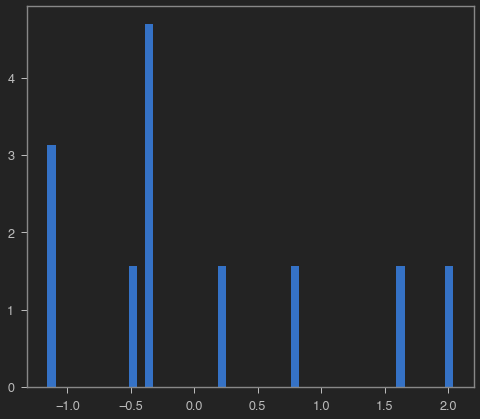

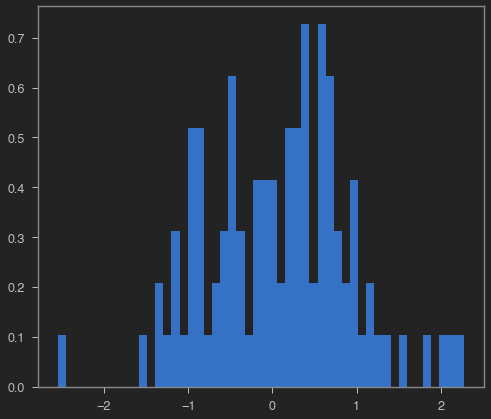

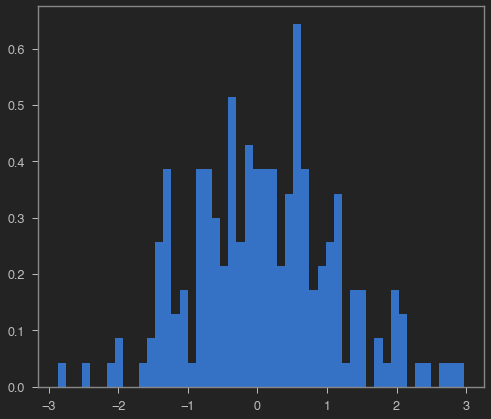

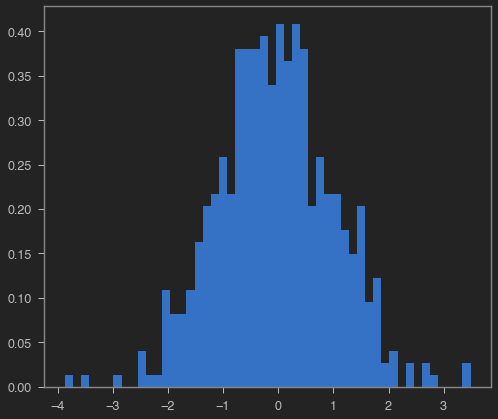

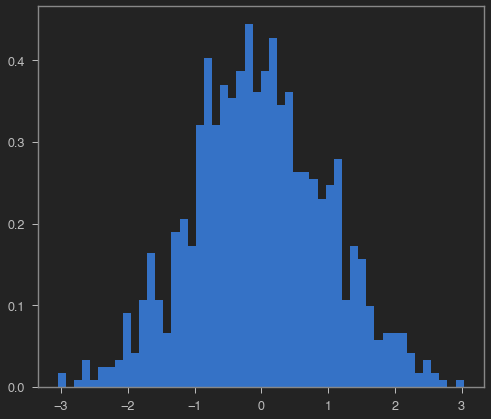

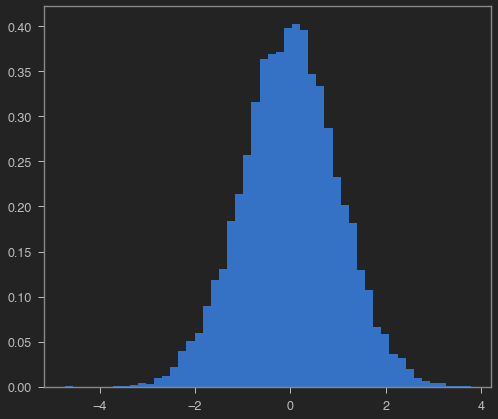

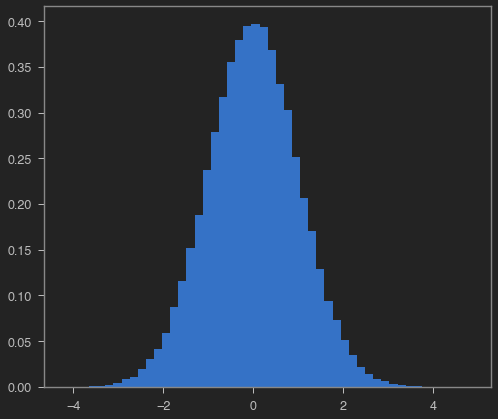

In [5]:
arr =  np.array([10,100,200,500,1000,10000,100000])# Create a numpy array of differnt values of no. of samples and plot the histogram to show the above 

for i in arr:
  x_sampled = np.random.normal(0,1,i)# Generate i samples from univariate gaussian distribution 
  plt.hist(x_sampled, bins = 50, density = True)
  plt.show()
  # write the code to plot the histogram of the samples for all values in arr 

c) Law of large number


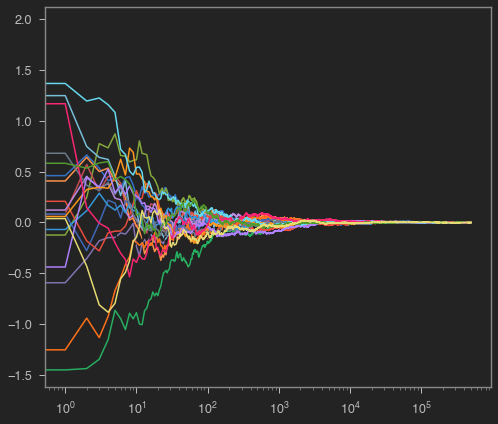

In [6]:
N = 500000 #  Number of points (>1000000) 
k =  20# set a value for number of distributions

## Below code plots the semilog when all the samples are equal to the mean of distribution

m = np.tile(mean,x.shape)
plt.semilogx(m,color='k')

for j in range(k):

  i =  np.arange(1,N+1)# Generate a list of numbers from (1,N)  
  x =  np.random.normal(0,1,N)# Generate N samples from univariate gaussian distribution # Ref : https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
  mean_sampled =  np.cumsum(x)/(i)# insert your code here (Hint : Repeat the same steps as in the uniform distribution case)
  
  ## Write code to plot semilog scaled on x axis of mean_sampled, follow the above code of semilog for reference
  plt.semilogx(mean_sampled)
plt.show()


## 3.Sampling of categorical from uniform

i) Generate n points from uniforms distribution range from [0 1] (Take large n)

ii) Let $prob_{0} = 0.3$, $prob_{1} = 0.6$ and $prob_{2} = 0.1$ 

iii) Count the number of occurences and divide by the number of total draws for 3 scenarios : 
  1. $p_{0}$ : $<$ $prob_{0}$ 
  2. $p_{1}$ : $<$ $prob_{1}$
  3. $p_{2}$ : $<$ $prob_{2}$


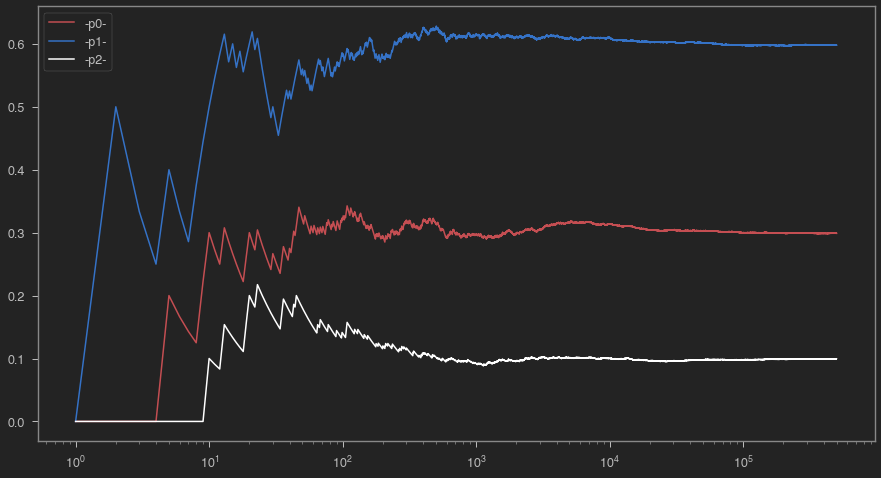

In [7]:
n = 500000# Number of points (>1000000)
y =  np.random.uniform(0,1,n)# Generate n points from uniform distribution range from [0 1]
x = np.arange(1, n+1)
prob0 = 0.3 
prob1 = 0.6
prob2 = 0.1

# count number of occurrences and divide by the number of total draws

p0 =  np.cumsum(y<prob0)/x# insert your code here
p1 =  np.cumsum(y<prob1)/x# insert your code here
p2 =  np.cumsum(y<prob2)/x# insert your code here


plt.figure(figsize=(15, 8))
plt.semilogx(x, p0,color='r')
plt.semilogx(x, p1,color='b')
plt.semilogx(x,p2,color='white')
plt.legend(['-p0-','-p1-','-p2-'])


## 4. Central limit theorem

a) Sample from a uniform distribution (-1,1), some 10000 no. of samples 1000 times (u1,u2,....,u1000). show addition of iid rendom variables converges to a Gaussian distribution as number of variables tends to infinity.

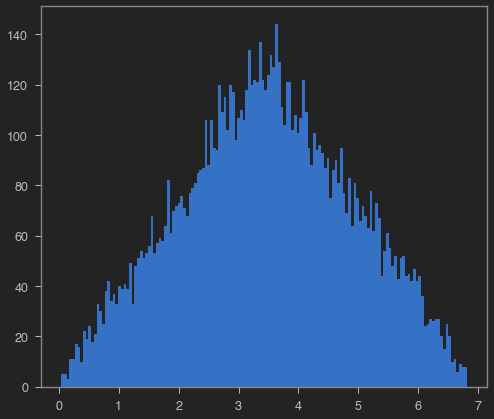

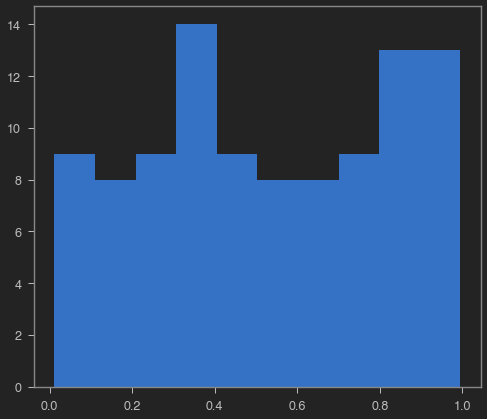

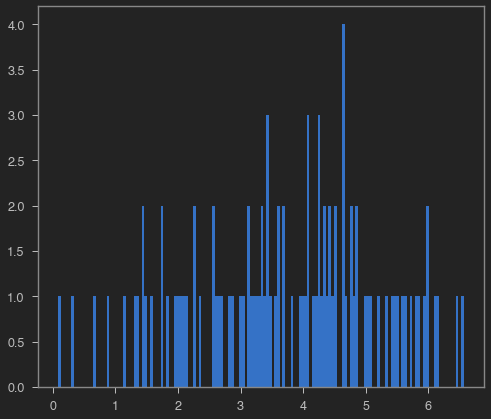

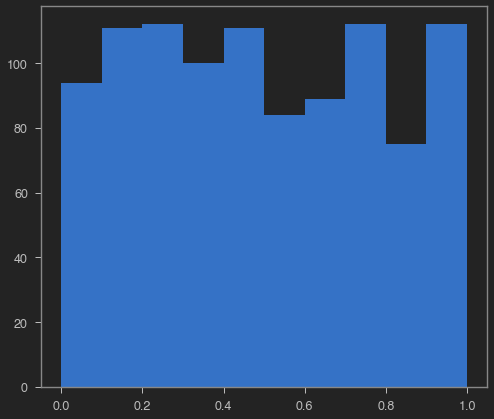

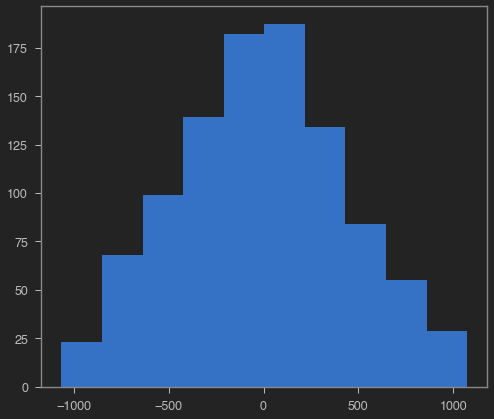

In [24]:
x = np.random.uniform(0,1,size=(10000,1000));# Generate 1000 diferent uniform distributions of 10000 samples each in range from [-1 1]


# addition of 2 random variables
tmp2=np.sum(x[:,0:2],axis=1)/(np.std(x[:,0:2]));
plt.figure
plt.hist(tmp2,150)
plt.show()

# Repeat the same for 100 and 1000 random variables
# addition of 100 random variables 

x = np.random.uniform(0,1,size=(100,1000));# Generate 1000 diferent uniform distributions of 10000 samples each in range from [-1 1]
plt.figure()
plt.hist(x[:,0])
plt.show()

# addition of 2 random variables
tmp2=np.sum(x[:,0:2],axis=1)/(np.std(x[:,0:2]));
plt.figure
plt.hist(tmp2,150)
plt.show()

# addition of 1000 random variables
# start code here
x = np.random.uniform(0,1,size=(1000,1000));# Generate 1000 diferent uniform distributions of 10000 samples each in range from [-1 1]
plt.figure()
plt.hist(x[:,0])
plt.show()

# addition of 2 random variables
tmp2=np.sqrt(1000)*np.sum((x[:,0:2]-0.5),axis=1)/(np.std(x[:,0:2]));
plt.figure
plt.hist(10*tmp2+10)
plt.show()

## 5. Computing $\pi$ using sampling

a) Generate 2D data from uniform distribution of range -1 to 1 and compute the value of $\pi$.

b) Equation of circle
$$x^{2}+y^{2}=1$$

c) Area of a circle can be written as:
$$\frac{No~of~points~(x^{2}+y^{2}<=1)}{Total~no.~generated~points}=\frac{\pi r^{2}}{(2r)^{2}}$$
where r is the radius of the circle and $2r$ is the length of the vertices of square.


computed value of pi= 3.140724


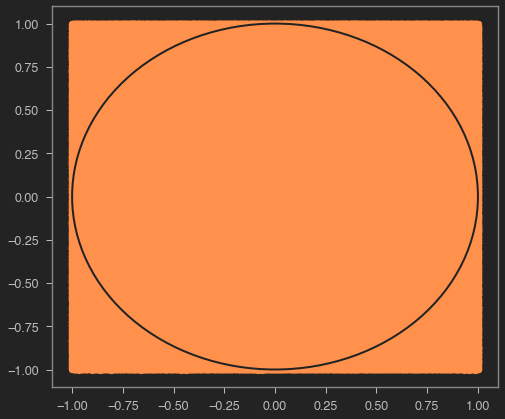

In [9]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.gcf()
ax = fig.gca()

radius = 1

n = 1000000 # set the value of n (select large n for better results)
x =  np.random.uniform(-1,1,size=(n,2))# Generate n samples of 2D data from uniform distribution from range -1 to 1 (output will be a (n X 2) matrix) (Ref = https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html )

ax.scatter(x[:,0],x[:,1],color='y') # Scatter plot of x


# find the number points present inside the circle

x_cr =  np.sum(x[:,0]*x[:,0]+x[:,1]*x[:,1]<radius*radius)# insert your code here

circle1 = plt.Circle((0, 0), 1,fc='None',ec='k',lw=2)
ax.add_artist(circle1) # plotting circle of radius 1 with centre at (0,0)

pi =  4*x_cr/n# calculate pi value using x_cr and radius

print('computed value of pi=',pi)




## 6. Monty Hall problem

Here's a fun and perhaps surprising statistical riddle, and a good way to get some practice writing python functions

In a gameshow, contestants try to guess which of 3 closed doors contain a cash prize (goats are behind the other two doors). Of course, the odds of choosing the correct door are 1 in 3. As a twist, the host of the show occasionally opens a door after a contestant makes his or her choice. This door is always one of the two the contestant did not pick, and is also always one of the goat doors (note that it is always possible to do this, since there are two goat doors). At this point, the contestant has the option of keeping his or her original choice, or swtiching to the other unopened door. The question is: is there any benefit to switching doors? The answer surprises many people who haven't heard the question before.

Follow the function descriptions given below and put all the functions together at the end to calculate the percentage of winning cash prize in both the cases (keeping the original door and switching doors)

Note : You can write your own functions, the below ones are given for reference, the goal is to calculate the win percentage
 
Try this fun problem and if you find it hard, you can refer to the solution [here](https://nbviewer.jupyter.org/github/cs109/2014/blob/master/homework-solutions/HW0_solutions.ipynb)

In [10]:
"""
Function
--------
simulate_prizedoor

Generate a random array of 0s, 1s, and 2s, representing
hiding a prize between door 0, door 1, and door 2

Parameters
----------
nsim : int
    The number of simulations to run

Returns
-------
sims : array
    Random array of 0s, 1s, and 2s

Example
-------
>>> print simulate_prizedoor(3)
array([0, 0, 2])
"""
def simulate_prizedoor(nsim):

    answer = np.random.randint(0,3,nsim) # write your code here
  
    return answer

In [11]:
"""
Function
--------
simulate_guess

Return any strategy for guessing which door a prize is behind. This
could be a random strategy, one that always guesses 2, whatever.

Parameters
----------
nsim : int
    The number of simulations to generate guesses for

Returns
-------
guesses : array
    An array of guesses. Each guess is a 0, 1, or 2

Example
-------
>>> print simulate_guess(5)
array([0, 0, 0, 0, 0])
"""
#your code here

def simulate_guess(nsim):

    answer = np.random.randint(0,3,nsim)# write your code here

    return answer

In [12]:
"""
Function
--------
goat_door

Simulate the opening of a "goat door" that doesn't contain the prize,
and is different from the contestants guess

Parameters
----------
prizedoors : array
    The door that the prize is behind in each simulation
guesses : array
    THe door that the contestant guessed in each simulation

Returns
-------
goats : array
    The goat door that is opened for each simulation. Each item is 0, 1, or 2, and is different
    from both prizedoors and guesses

Examples
--------
>>> print goat_door(np.array([0, 1, 2]), np.array([1, 1, 1]))
>>> array([2, 2, 0])
"""
# write your code here # Define a function and return the required array
def goat_door(nsim,prize,guess):
    goats = np.zeros([nsim])
    for k in range(0,nsim):
        i = 0
        while(prize[k] == i or guess[k] == i):
            i = (i+1)%3
        goats[k] = i
    return goats

In [13]:
"""
Function
--------
switch_guess

The strategy that always switches a guess after the goat door is opened

Parameters
----------
guesses : array
     Array of original guesses, for each simulation
goatdoors : array
     Array of revealed goat doors for each simulation

Returns
-------
The new door after switching. Should be different from both guesses and goatdoors

Examples
--------
>>> print switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1]))
>>> array([2, 0, 0])
"""
# write your code here # Define a function and return the required array
def switch_guess(guesses,goatdoors):
        sw_gs = np.zeros([nsim])
        for k in range(0,nsim):
            i = 0
            while(goatdoors[k] == i or guesses[k] == i):
                i = (i+1)%3
            sw_gs[k] = i
        return sw_gs

In [14]:
"""
Function
--------
win_percentage

Calculate the percent of times that a simulation of guesses is correct

Parameters
-----------
guesses : array
    Guesses for each simulation
prizedoors : array
    Location of prize for each simulation

Returns
--------
percentage : number between 0 and 100
    The win percentage

Examples
---------
>>> print win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))
33.333
"""

def win_percentage(guesses, prizedoors):

    answer = 100 * (guesses == prizedoors).mean()
  
    return answer

In [15]:
## Put all the functions together here

nsim = 100000# Number of simulations

## case 1 : Keep guesses 
# write your code here (print the win percentage when keeping original door)
prizes = simulate_prizedoor(nsim)
guesses = simulate_guess(nsim)
win = win_percentage(guesses,prizes)
## case 2 : switch 
goat = goat_door(nsim,prizes,guesses)
switch = switch_guess(guesses,goat)
win2 = win_percentage(switch,prizes)
# write your code here (print the win percentage when switching doors)
print("Win percentage when doors not switched:",win)
print("Win percentage when doors switched:",win2)

Win percentage when doors not switched: 33.228
Win percentage when doors switched: 66.77199999999999
